### This is for Lab04 of COMP9517

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q1 watershed doing the segmentation of the ball picture

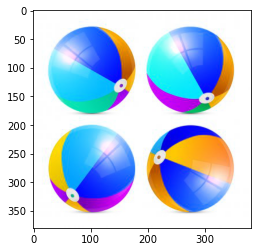

In [26]:
# Reading the bgr image from the dir
image_input = cv2.imread('./ball_set.jpg')
plt.imshow(image_input)

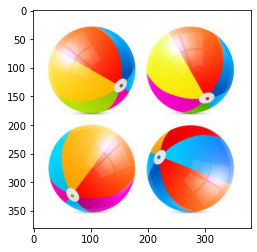

In [27]:
# change the color to rgb
# This is for question 2 MeanShift
image_rgb = cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

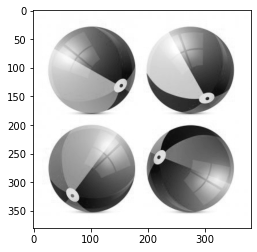

In [28]:
# Change the rgb image to gray image
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
# img_gray = (255-img_gray)
plt.imshow(image_gray,'gray')

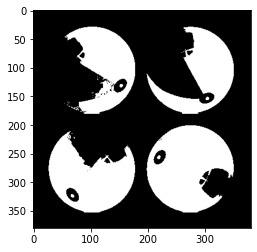

In [149]:
# Watershed needs the binary image which need the cv2.threshold
# Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

# Otsu’s Binarization
# Source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

# This 169 is for filtering the color gray
ret, image_thresh = cv2.threshold(image_gray,169 ,180 , cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU,cv2.THRESH_BINARY)
plt.imshow(image_thresh, 'gray')

In [150]:
# Start using the watershed Algorithm
# Some of the codes are from the following sample provided by the instruction of Lab04
# Source: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html

In [151]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed

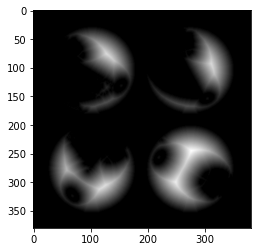

In [152]:
# This method is used to calculate the Euclidean distance
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.distance_transform_edt.html
distance = ndi.distance_transform_edt(image_thresh)
# Show the image of Euclidean distance
plt.imshow(distance, 'gray')

In [153]:
# Finding local maximum by using peak_local_max
# Source: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html
local_max_point = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=image_thresh)

<ipython-input-153-059884ba611e>:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max_point = peak_local_max(distance,indices=False,footprint=np.ones((3,3)),labels=image_thresh)


In [154]:
# Getting the maximum points and tag the labels 
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html
# Getting the first part of the output
markers = ndi.label(local_max_point)[0]

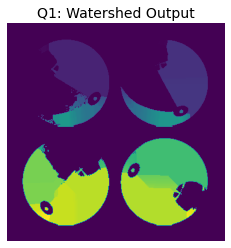

In [155]:
# Getting the labeled image based on the markers
labels = watershed(-distance, markers, mask=image_thresh)
plt.axis('off')
plt.title("Q1: Watershed Output",fontsize=14)
plt.imshow(labels)

In [156]:
# Show the image with the spectrum 
# This can help you see the boundry clearly
# plt.imshow(labels,cmap=plt.cm.nipy_spectral)

### Q2 MeanShift doing the segmentation of the ball picture

In [157]:
from sklearn.cluster import MeanShift

(380, 380, 3)


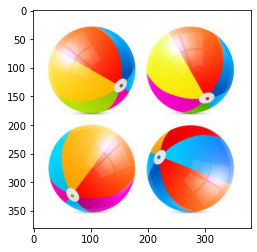

In [158]:
# Question 2 will use the previous rgb image
# Can also use the bgr version 
# Notice the sequence of the rgb or bgr
plt.imshow(image_rgb)
print(image_rgb.shape)

In [159]:
# Based on the information of piazza
# Resized the image to 100,100

In [160]:
resized_image = cv2.resize(image_rgb,(100,100))
print(resized_image.shape)
print(image_rgb.shape)

(100, 100, 3)
(380, 380, 3)


In [161]:
# The following part is doting the resize operation

In [162]:
# Using the slice method to cut the channel from the image
channel_r = resized_image[:,:,0]
channel_g = resized_image[:,:,1]
channel_b = resized_image[:,:,2]

In [163]:
# Check the shape of each channel
# Shape are same can also check once
print(f"The size of resized channel red is {channel_r.shape}")
print(f"The size of resized channel green is {channel_g.shape}")
print(f"The size of resized channel blue is {channel_b.shape}")

The size of resized channel red is (100, 100)
The size of resized channel green is (100, 100)
The size of resized channel blue is (100, 100)


In [164]:
# Flatten the color matrix
# Source: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
red_flatten = channel_r.flatten()
green_flatten = channel_g.flatten()
blue_flatten = channel_b.flatten()

In [165]:
# Stack each channel itseld get 3 seperate result
color_samples_single_r = np.column_stack([red_flatten])
color_samples_single_g = np.column_stack([green_flatten])
color_samples_single_b = np.column_stack([blue_flatten])

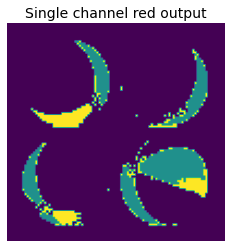

In [166]:
# for red channel doing the flatten
# How to use meanshift
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
ms_clf_r = MeanShift(bin_seeding=True)
ms_labels_single_r = ms_clf_r.fit_predict(color_samples_single_r).reshape(100,100)
plt.axis('off')
plt.title("Single channel red output",fontsize=14)
plt.imshow(ms_labels_single_r)

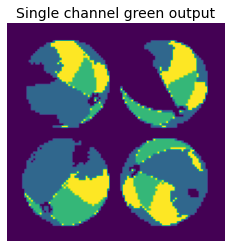

In [167]:
# for green channel doing the flatten
ms_clf_g = MeanShift(bin_seeding=True)
ms_labels_single_g = ms_clf_g.fit_predict(color_samples_single_g).reshape(100,100)
plt.axis('off')
plt.title("Single channel green output",fontsize=14)
plt.imshow(ms_labels_single_g)

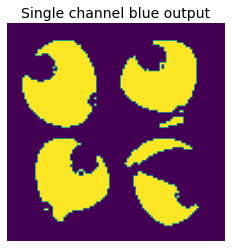

In [168]:
# for blue channel doing the flatten
ms_clf_b = MeanShift(bin_seeding=True)
ms_labels_single_b = ms_clf_b.fit_predict(color_samples_single_b).reshape(100,100)
plt.axis('off')
plt.title("Single channel blue output",fontsize=14)
plt.imshow(ms_labels_single_b)

In [169]:
# Stack 3 channels together and get the final result of question 2
color_samples_total = np.column_stack([red_flatten,green_flatten,blue_flatten])
print(color_samples_total.shape)

(10000, 3)


In [170]:
# Setting classifier
ms_clf = MeanShift(bin_seeding=True)
ms_labels = ms_clf.fit_predict(color_samples_total).reshape(100,100)

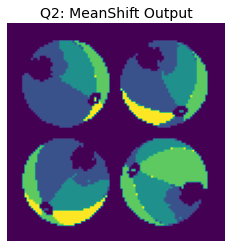

In [171]:
# print(ms_labels.shape)
plt.axis('off')
plt.title("Q2: MeanShift Output",fontsize=14)
plt.imshow(ms_labels)

### Q3 change the image to the plannet

In [172]:
# Read the plannet

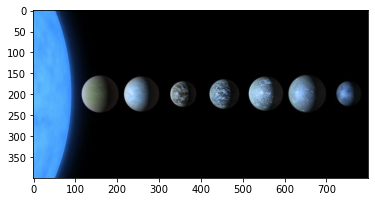

In [173]:
planet_input = cv2.imread('./planets.jpg')
plt.imshow(planet_input)

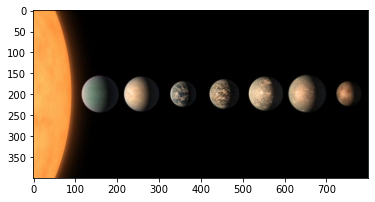

In [174]:
planet_rgb = cv2.cvtColor(planet_input,cv2.COLOR_BGR2RGB)
plt.imshow(planet_rgb)

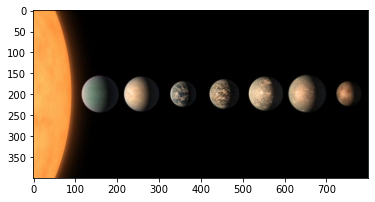

In [175]:
planet_gray = cv2.cvtColor(planet_input,cv2.COLOR_RGB2GRAY)
plt.imshow(planet_rgb,'gray')

### Watershed method ------ Planet

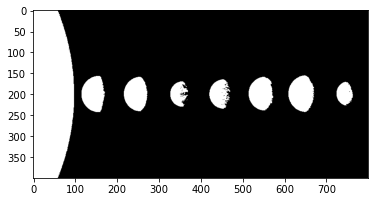

In [281]:
# 
planet_ret, planet_thresh = cv2.threshold(planet_gray, 50 , 40 , cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(planet_thresh, 'gray')

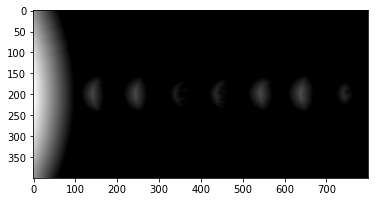

In [282]:
planet_distance = ndi.distance_transform_edt(planet_thresh)
# Show the image of Euclidean distance
plt.imshow(planet_distance, 'gray')

In [283]:
planet_max_point = peak_local_max(planet_distance,indices=False,footprint=np.ones((3,3)),labels=planet_thresh)

<ipython-input-283-a71e94834e47>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  planet_max_point = peak_local_max(planet_distance,indices=False,footprint=np.ones((3,3)),labels=planet_thresh)


In [284]:
planet_markers = ndi.label(planet_max_point)[0]

In [285]:
planet_labels = watershed(-planet_distance, planet_markers, mask=planet_thresh)

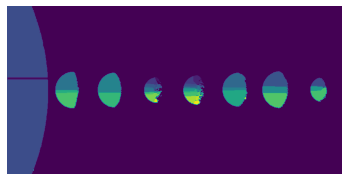

In [286]:
plt.axis('off')
plt.imshow(planet_labels)

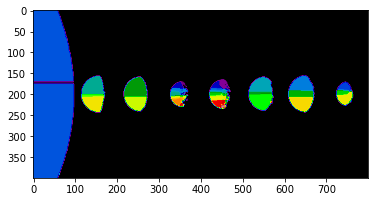

In [287]:
plt.imshow(planet_labels,plt.cm.nipy_spectral)